In [139]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [141]:
# toy dataset
One=pd.Series([1,2,3,4,5],name="One")
Two=pd.Series([6,7,8,9,10],name="Two")

In [143]:
# create a pandas dataframe of the name of df; axis=1 is for columns
df=pd.concat([One,Two],axis='columns')
df

,One,Two
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [145]:
# grand mean
GM=(np.mean(One)+np.mean(Two))/2
GM

5.5

In [191]:
# summarize the  data and describe
df.describe()

,One,Two
count,5.000000,5.000000
mean,3.000000,8.000000
std,1.581139,1.581139
min,1.000000,6.000000
25%,2.000000,7.000000
50%,3.000000,8.000000
75%,4.000000,9.000000
max,5.000000,10.000000


Sum of Squares Treatment 

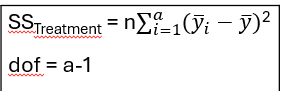

In [194]:
5 * ((np.mean(One)-GM)**2 + (np.mean(Two)-GM)**2 )

62.5

Mean Squares Treatment

dof= a-1 = 1

Sum of Squares Error

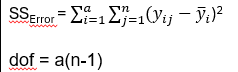

dof = 2(5-1) = 8

In [200]:
np.sum( ((One-np.mean(One))**2) + ((Two-np.mean(Two))**2) ) /8

2.5

In [202]:
((1-3)**2 + (2-3)**2+(3-3)**2+(4-3)**2+(5-3)**2+(6-8)**2+(7-8)**2+(8-8)**2+(9-8)**2+(10-8)**2)/8

2.5

F = 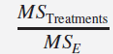

ratio of variance

In [205]:
62.5/2.5

25.0

Test the calcualted F-test statistic

In [208]:
from scipy.stats import f
1-f.cdf(10,1,8)

0.013349063426018715

In [210]:
stats.f_oneway(df["One"],df["Two"])

F_onewayResult(statistic=25.0, pvalue=0.0010528257933665396)

Interesting note that this is the t-statistic squared with the same p-value

In [213]:
print(stats.ttest_ind(One, Two, equal_var=True))

TtestResult(statistic=-5.0, pvalue=0.001052825793366539, df=8.0)


Text(46.972222222222214, 0.5, 'strength')

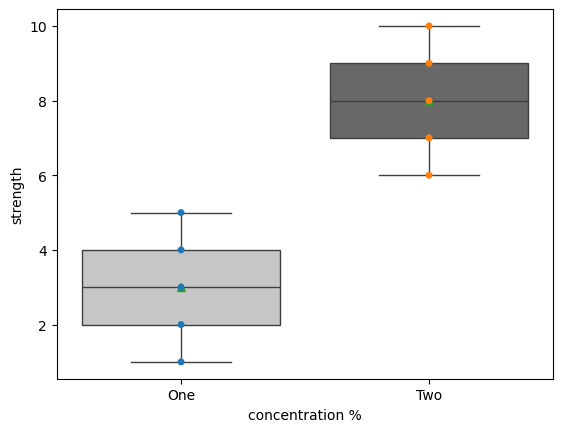

In [172]:
# Plot the data to visualize
ax=sns.boxplot(data=df,showmeans=True,palette="Greys")
ax=sns.swarmplot(data=df)
plt.xlabel("concentration %")
plt.ylabel("strength")

Text(0.5, 9.444444444444438, 'strength')

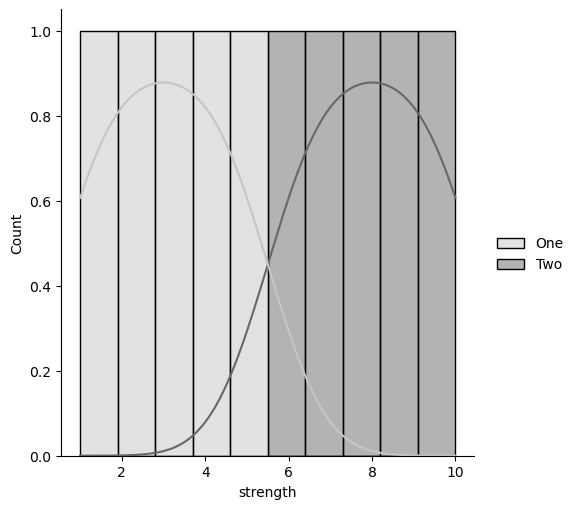

In [174]:
# take a look at the distributions as well
sns.displot(df,palette="Greys",bins=10,kde=True,stat="count")
plt.xlabel("strength")

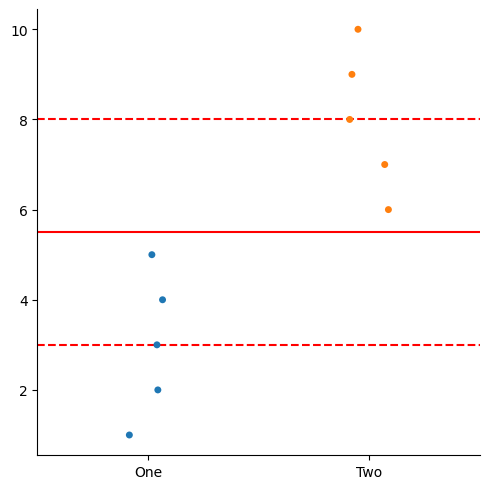

In [175]:
# Cat Plot Between and Within OR Treatment and Error Effects
sns.catplot(data=df)
plt.axhline(y=5.5,color="red")
plt.axhline(y=3, linestyle='--',color="red") 
plt.axhline(y=8, linestyle='--',color="red") 